In [131]:
import numpy as np
import pandas as pd
import astropy.io.fits as fits
import seaborn as sb
import aplpy
import healpy as hp
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from drizzlib.healpix2wcs import healpix2wcs
from   pylab import arange, show, cm
import matplotlib.gridspec as gridspec    
from matplotlib.colors import SymLogNorm
import astropy.io.fits as fits
cmap = cm.rainbow
cmap.set_under('w')


# $\lambda$ Orionis as seen in ancilliary data

In [32]:


def fits_display(image_file, units = 'Intensity (MJy/sr)'):
    
    from   pylab import arange, show, cm
    
    cmap = cm.rainbow
    cmap.set_under('w')

 
    # Create a new figure
    fig = aplpy.FITSFigure(image_file)

    #Show the colorscale
    fig.show_colorscale(cmap = cmap)

    #Make ticks white
    fig.ticks.set_color('white')

    # Make labels smaller
    fig.tick_labels.set_font(size=20)
    
    # Round out those tick labels:
    fig.tick_labels.set_xformat('ddd')
    fig.tick_labels.set_yformat('ddd')
    
    # Overlay a grid
    fig.add_grid()
    fig.grid.set_alpha(0.5)
    
    # Add a colorbar
    fig.add_colorbar()
    fig.colorbar.set_axis_label_text(units)
    
    return fig



def make_fits_cutout(hdr_temp, hp_path, out_path, hp_hdu=1, field =0, is_sigma=False, units = "MJy/sr"):
    

    
    healpix2wcs( 
            hp_path,
            hp_hdu=hp_hdu,
            field=field, 
            header=hdr_temp, 
            output=out_path, 
            ignore_blank =True,
            blank_value=hp.UNSEEN, 
            is_sigma=is_sigma,
            clobber=True)
    
    return fits_display(out_path, units=units)


In [30]:
### Make cutouts for all of the maps
# H-

['halpha','nhcol']

hp_paths  = '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/lambda_halpha_fwhm06_0512.fits',
            '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/lambda_combined_nh.fits'
            


IndentationError: unexpected indent (<ipython-input-30-6e2421fff348>, line 7)

INFO: Auto-setting vmin to -1.482e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.170e+02 [aplpy.core]
INFO: Auto-setting vmin to -3.717e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.126e+02 [aplpy.core]


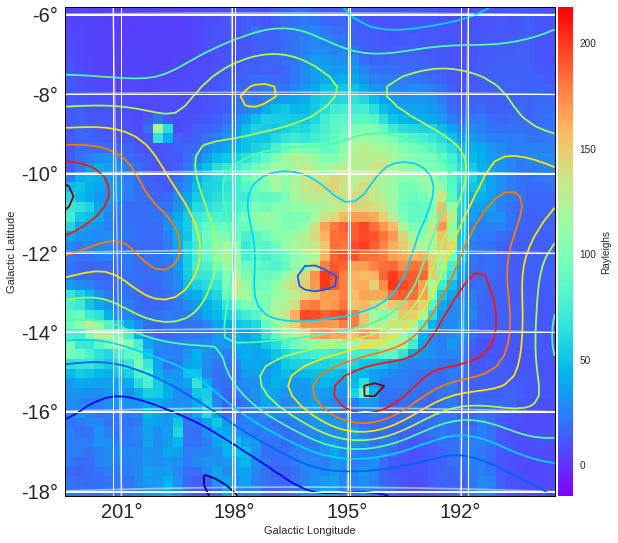

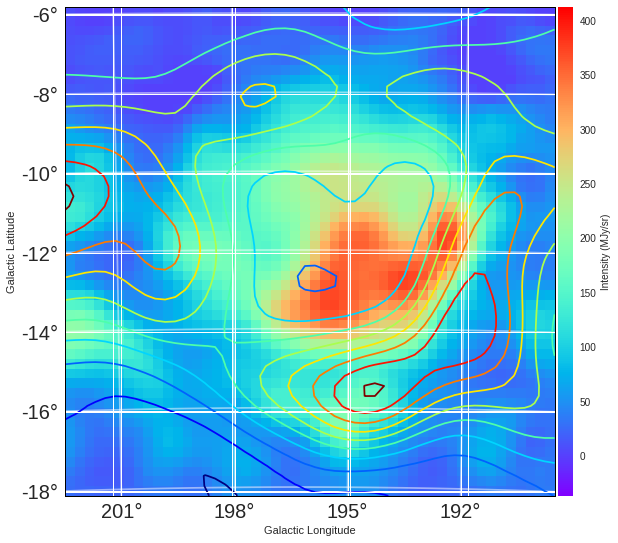

In [36]:
halpha = fits_display('../Data/LOri_halpha.fits', units = 'Rayleighs')
halpha.show_contour('../Data/LOri_AME1_I_256.fits', levels=10, smooth=3)
plt.savefig('../Plots/ch_lori/LOri_halpha_AMEvarContours.pdf')

ff  = fits_display('../Data/LOri_COMMANDERff.fits')
ff.show_contour('../Data/LOri_AME1_I_256.fits', levels=10, smooth=3)


# N(H)

# Planck-COMMANDER AME (1and2)

In [ ]:
#fits_display(hdr_temp)
ame2_img = fits_display("/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME2_I_256.fits")
#freq_levels = range(10,25)
#print freq_levels

ame2_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
 #                    levels = freq_levels,
                     smooth = 1)



In [ ]:
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_WMAP23.fits'

hp_path = '../Data/raw/WMAP/wmap_band_imap_r9_5yr_K_v3.fits'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

wmap30_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)
wmap30_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
 #                    levels = freq_levels,
                     smooth = 1)

In [ ]:
#fits_display(hdr_temp)
ameC_img = fits_display("/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME2_I_256.fits")
#freq_levels = range(10,25)
#print freq_levels

ameC_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
 #                    levels = freq_levels,
                     smooth = 1)



### Planck-COMMANDER AME1 (Freq)

Using Python 2.7.12 |Anaconda 2.4.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ignoring BLANK HEALPixels of value -1637499999999999923489519697920.
786432 HEALPixels in the whole map.
Coordinates frame is '<Galactic Frame>'.
3713 HEALPixels in the WCS wrapper polygon.


INFO: Auto-setting vmin to  1.402e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.447e+01 [aplpy.core]


NameError: name 'ame1_snr' is not defined

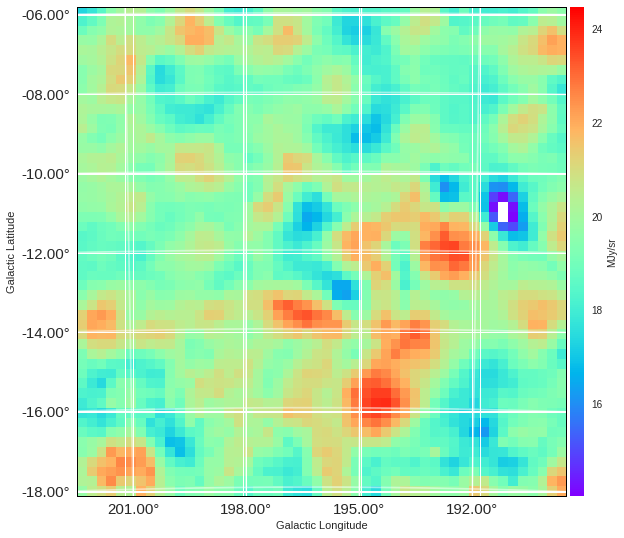

In [212]:
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits'
hp_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/COM_CompMap_AME-commander_0256_R2.00_var_FREQ_MEAN.fits'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)

plt.imshow(
    np.reshape(
        ame1_snr, (50,50)
        ), 
    cmap="rainbow")

plt.colorbar()
plt.show()
plt.hist(hp.read_map())
plt.show()

# LFI 30 GHz

In [ ]:
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_LFI30.fits'

hp_path = '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/planck/LFI_SkyMap_030-BPassCorrected_0256_R2.01_full.fits'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

lfi30_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)

lfi30_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
                     levels = freq_levels,
                     smooth = 1)

# Haslam 408 MHz

Note the maxima at 195, -12 - perhaps synchrotron emission driven by the magnetic field of Meissa itself?
In this pixel scale, the beam PSF is approximately 1 degree wide (we have not investigated the exact effective PSF shape, for this HEALPix regridding of the Haslam data.) We can say counterparts to this maxima in all of the images of the Meissa-ring region. The one exception is the H-alpha map; such a maxima may be obscured, since the surronding 4-degree region (essentially, everything inside of the molecular ring) is bright in H-alpha.

In [ ]:
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_haslam.fits'

hp_path = '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/haslam408_dsds_Remazeilles2014.fits'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

haslam408_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)


haslam408_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
                     levels = freq_levels,
                     smooth = 1)

# LFI 70 GHz

Using Python 2.7.12 |Anaconda 2.4.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ignoring BLANK HEALPixels of value -1637499999999999923489519697920.
786432 HEALPixels in the whole map.
Coordinates frame is '<Galactic Frame>'.
3713 HEALPixels in the WCS wrapper polygon.


INFO: Auto-setting vmin to -2.339e-04 [aplpy.core]
INFO: Auto-setting vmax to  1.842e-04 [aplpy.core]


NameError: name 'freq_levels' is not defined

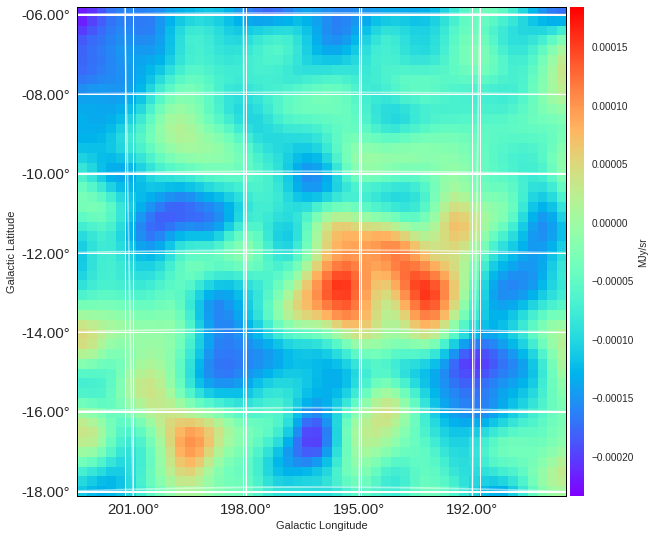

In [213]:
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_LFI70.fits'

hp_path = '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/planck/LFI_SkyMap_070-BPassCorrected_0256_R2.01_full.fits'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

lfi70_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)

lfi70_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
                     levels = freq_levels,
                     smooth = 1)
#lfi70_img.

# Planck 857 GHz

In [ ]:


out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_HFI857.fits'

hp_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/planck_857_256_1dres.fits.gz'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

hfi857_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)

hfi857_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
                     levels = freq_levels,
                     smooth = 1)

Using Python 2.7.12 |Anaconda 2.4.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ignoring BLANK HEALPixels of value -1637499999999999923489519697920.
786432 HEALPixels in the whole map.
Coordinates frame is '<Galactic Frame>'.
3713 HEALPixels in the WCS wrapper polygon.


INFO: Auto-setting vmin to -1.319e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.779e+01 [aplpy.core]


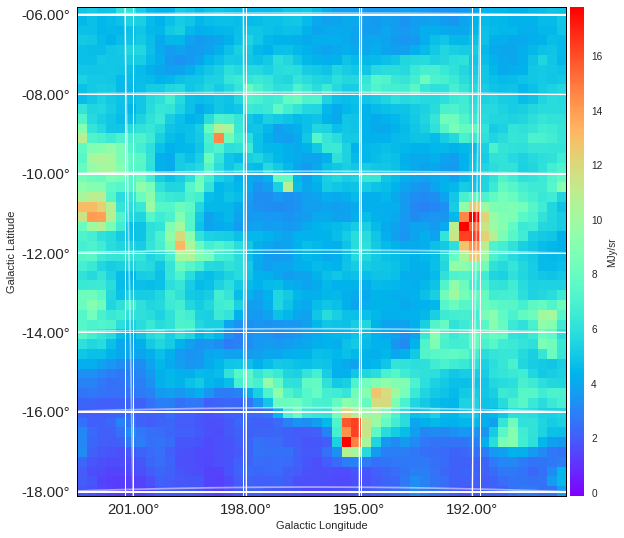

In [214]:


out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_HFI545.fits'

hp_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/planck_545_256_1dres.fits.gz'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)

In [215]:
make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path,
                 field=1)

Using Python 2.7.12 |Anaconda 2.4.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


IndexError: list index out of range

In [ ]:


out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_COMMANDERff.fits'

hp_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/COM_CompMap_freefree-commander_0256_R2.00.fits.gz'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

ff_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path,
                 field=0)

ff_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
                     levels = freq_levels,
                     smooth = 1)

out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_COMMANDERff_rms.fits'


ff_rms_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path,
                 is_sigma=True,
                 field=2)

ff_rms_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
                     levels = freq_levels,
                     smooth = 1)


Using Python 2.7.12 |Anaconda 2.4.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ignoring BLANK HEALPixels of value -1637499999999999923489519697920.
786432 HEALPixels in the whole map.
Coordinates frame is '<Galactic Frame>'.
3713 HEALPixels in the WCS wrapper polygon.


INFO: Auto-setting vmin to  5.274e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.109e+03 [aplpy.core]


NameError: name 'freq_levels' is not defined

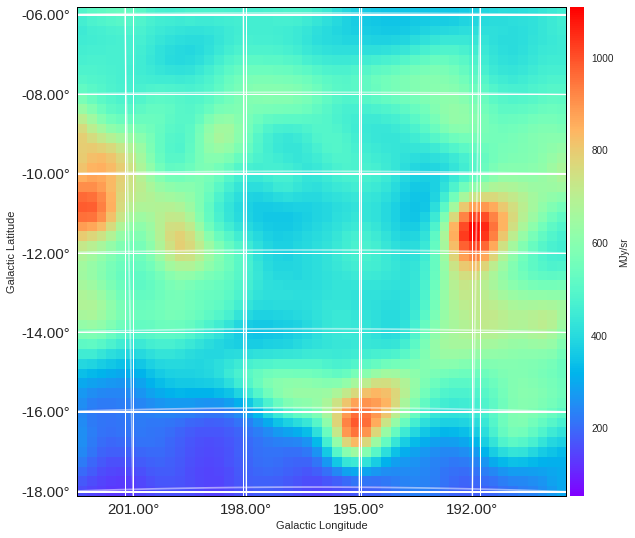

In [255]:


out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_PR2_Idust.fits'

hp_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/COM_CompMap_dust-commander_0256_R2.00.fits.gz'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

pr2Idust_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path,
                 field=0)



INFO: Auto-setting vmin to -2.465e-08 [aplpy.core]
INFO: Auto-setting vmax to  2.874e-06 [aplpy.core]


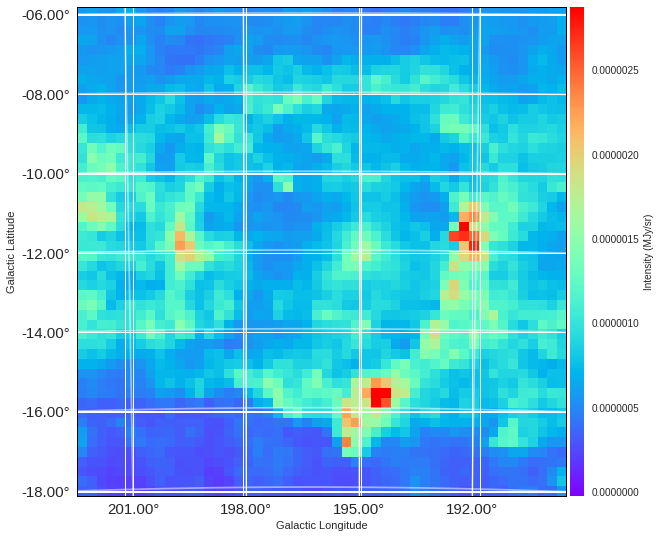

In [674]:
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_PR1_rad.fits'
fits_display(out_path)

# AMEvar Peak Intensity

INFO: Auto-setting vmin to -2.466e+04 [aplpy.core]
INFO: Auto-setting vmax to  2.933e+05 [aplpy.core]


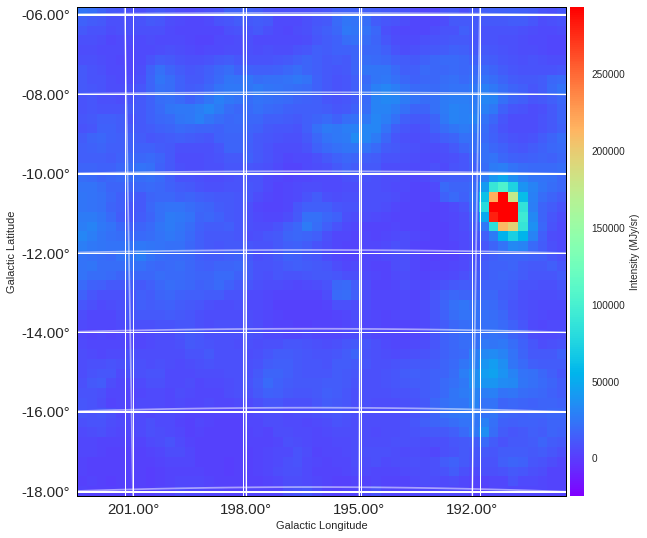

In [673]:
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AMEvar_IPeak.fits'
fits_display(out_path)

In [ ]:
import astropy.io.fits as fits
ame1_I = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits').flatten()
ame1_I_rms = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_Irms_256.fits').flatten()
ff_I = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_COMMANDERff.fits').flatten()
ff_I_rms = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_COMMANDERff_rms.fits').flatten()


sb.jointplot(ame1_I_rms, ff_I_rms, kind = "hex")

In [ ]:
ame1_snr = ame1_I / ame1_I_rms
ff_snr = ff_I / ff_I_rms
sb.jointplot( ame1_snr , ff_snr, kind = 'kde' )
sb.jointplot( ame1_I , ff_snr, kind = 'kde' )

In [ ]:
sb.jointplot( ame1_I , ff_I_rms, kind = 'kde' )

In [ ]:
sb.jointplot( ame1_I , ff_I, kind = 'kde' )

In [ ]:
import matplotlib.pylab as plt
import numpy as np
plt.imshow(np.reshape(ame1_snr, (50,50)), cmap="rainbow")
plt.colorbar()
plt.show()
plt.hist(ame1_I_rms)
plt.show()

In [ ]:
plt.imshow(np.reshape(ff_snr, (50,50)), cmap="rainbow_r")
plt.colorbar()
plt.show()
plt.hist(ff_I_rms)
plt.show()

In [ ]:
PR2_Idust = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_PR2_Idust.fits').flatten()

In [ ]:
ame_rad_ratio = ame1_I / PR2_Idust
ame_rad_diff = ame1_I - PR2_Idust


In [ ]:
plt.imshow(np.reshape(ame_rad_ratio, (50,50)), cmap="rainbow")
plt.colorbar()
plt.show()
plt.hist(ame_rad_ratio)
plt.show()

In [ ]:
plt.imshow(np.reshape(ame_rad_diff, (50,50)), cmap="rainbow")
plt.colorbar()
plt.show()
plt.hist(ame_rad_diff)
plt.show()

In [124]:

lori_df = pd.DataFrame()
lori_df_mask = pd.DataFrame()
lori_df['A9']  = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_akari_9_256.fits').flatten()
lori_df['D12']  = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_dirbe_12_256.fits').flatten()
lori_df['I12']  = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_iras_12_256.fits').flatten()
lori_df['A18'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_akari_18_256.fits').flatten()
lori_df['D25']  = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_dirbe_25_256.fits').flatten()
lori_df['I25']  = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_iras_25_256.fits').flatten()
lori_df['D60'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_dirbe_60_256.fits').flatten()
lori_df['A65'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_akari_65_256.fits').flatten()
lori_df['A90'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_akari_90_256.fits').flatten()
lori_df['A140'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_akari_140_256.fits').flatten()
lori_df['A160'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_akari_160_256.fits').flatten()
lori_df['P857'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_planck_857_256.fits').flatten()
lori_df['P545'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_planck_545_256.fits').flatten()
#lori_df['AMEfix'] = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME2_I_256.fits').flatten()
#lori_df['AMEvar'] = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AMEvar_IPeak.fits').flatten()
lori_df['AME'] = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits').flatten()
lori_df_mask['mask'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_256_mask.fits').flatten()



# Mask DIRBE outliers. Apply mask to all bands

In [125]:
lori_df_mask['mask'][lori_df['D12']>=1.3] = np.nan
#lori_df_mask['mask'][lori_df['AMEvar']>=5e4] = np.nan

for i in range(0, len(lori_df_mask['mask']) ):
    
    if np.isnan(lori_df_mask['mask'].iloc[i]):
    
        #print 'NaNpix at {}'.format(i)
        lori_df.iloc[i] = np.nan

# Background subtraction

In [129]:
bgbox_xp = 15
bgbox_yp = 5
bgbox_xw = 10
bgbox_yw = 5

lori_df_bgcorr = lori_df.copy()
backgrounds = []
noises = []

for band in lori_df.columns:
    
    data             = lori_df[band].values.reshape(50,50).copy()
    
    noise_level         = np.nanstd(data[bgbox_xp-(bgbox_xw/2):bgbox_xp+(bgbox_xw/2),bgbox_yp-(bgbox_yw/2):bgbox_yp+(bgbox_yw/2)])
    bg_level            = np.nanmedian(data[bgbox_xp-(bgbox_xw/2):bgbox_xp+(bgbox_xw/2),bgbox_yp-(bgbox_yw/2):bgbox_yp+(bgbox_yw/2)])
    
    data -= bg_level
    
    lori_df_bgcorr[band] = data.flatten()
    
   
    print "{} Noise level: {}".format(band,noise_level)
    print "{} BG level: {}".format(band,bg_level)
    
    # Save background levels for later
    backgrounds.append(bg_level)
    # Save noise levels for later
    noises.append(noise_level)
 

A9 Noise level: 0.283799529076
A9 BG level: 0.443567186594
D12 Noise level: 0.209391791468
D12 BG level: 0.447474290456
I12 Noise level: 0.197878477867
I12 BG level: 1.31426024852
A18 Noise level: 0.278827995062
A18 BG level: -0.218084216118
D25 Noise level: 0.205474679602
D25 BG level: 0.204863580966
I25 Noise level: 0.176731961158
I25 BG level: 1.7593998422
D60 Noise level: 1.27428417739
D60 BG level: 2.94713910538
A65 Noise level: 1.3792662766
A65 BG level: 5.4622166477
A90 Noise level: 3.35126252132
A90 BG level: 11.1879757933
A140 Noise level: 11.311452876
A140 BG level: 30.63173695
A160 Noise level: 9.5414632894
A160 BG level: 32.7243069444
P857 Noise level: 4.30920216327
P857 BG level: 10.5051228104
P545 Noise level: 1.40724256203
P545 BG level: 3.52939761916
AME Noise level: 81.7126048654
AME BG level: 106.469691562


# Visualized the processed data:

INFO: Auto-setting vmin to -5.388e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.605e+00 [aplpy.core]
INFO: Auto-setting vmin to -3.934e-01 [aplpy.core]
INFO: Auto-setting vmax to  9.432e-01 [aplpy.core]
INFO: Auto-setting vmin to -4.531e-01 [aplpy.core]
INFO: Auto-setting vmax to  9.712e-01 [aplpy.core]
INFO: Auto-setting vmin to -7.677e-01 [aplpy.core]
INFO: Auto-setting vmax to  9.957e-01 [aplpy.core]
INFO: Auto-setting vmin to -1.008e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.186e-01 [aplpy.core]
INFO: Auto-setting vmin to -1.036e+00 [aplpy.core]
INFO: Auto-setting vmax to  8.854e-01 [aplpy.core]
INFO: Auto-setting vmin to -3.117e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.808e+00 [aplpy.core]
INFO: Auto-setting vmin to -2.648e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.071e+01 [aplpy.core]
INFO: Auto-setting vmin to -7.645e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.833e+01 [aplpy.core]
INFO: Auto-setting vmin to -2.270e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.7

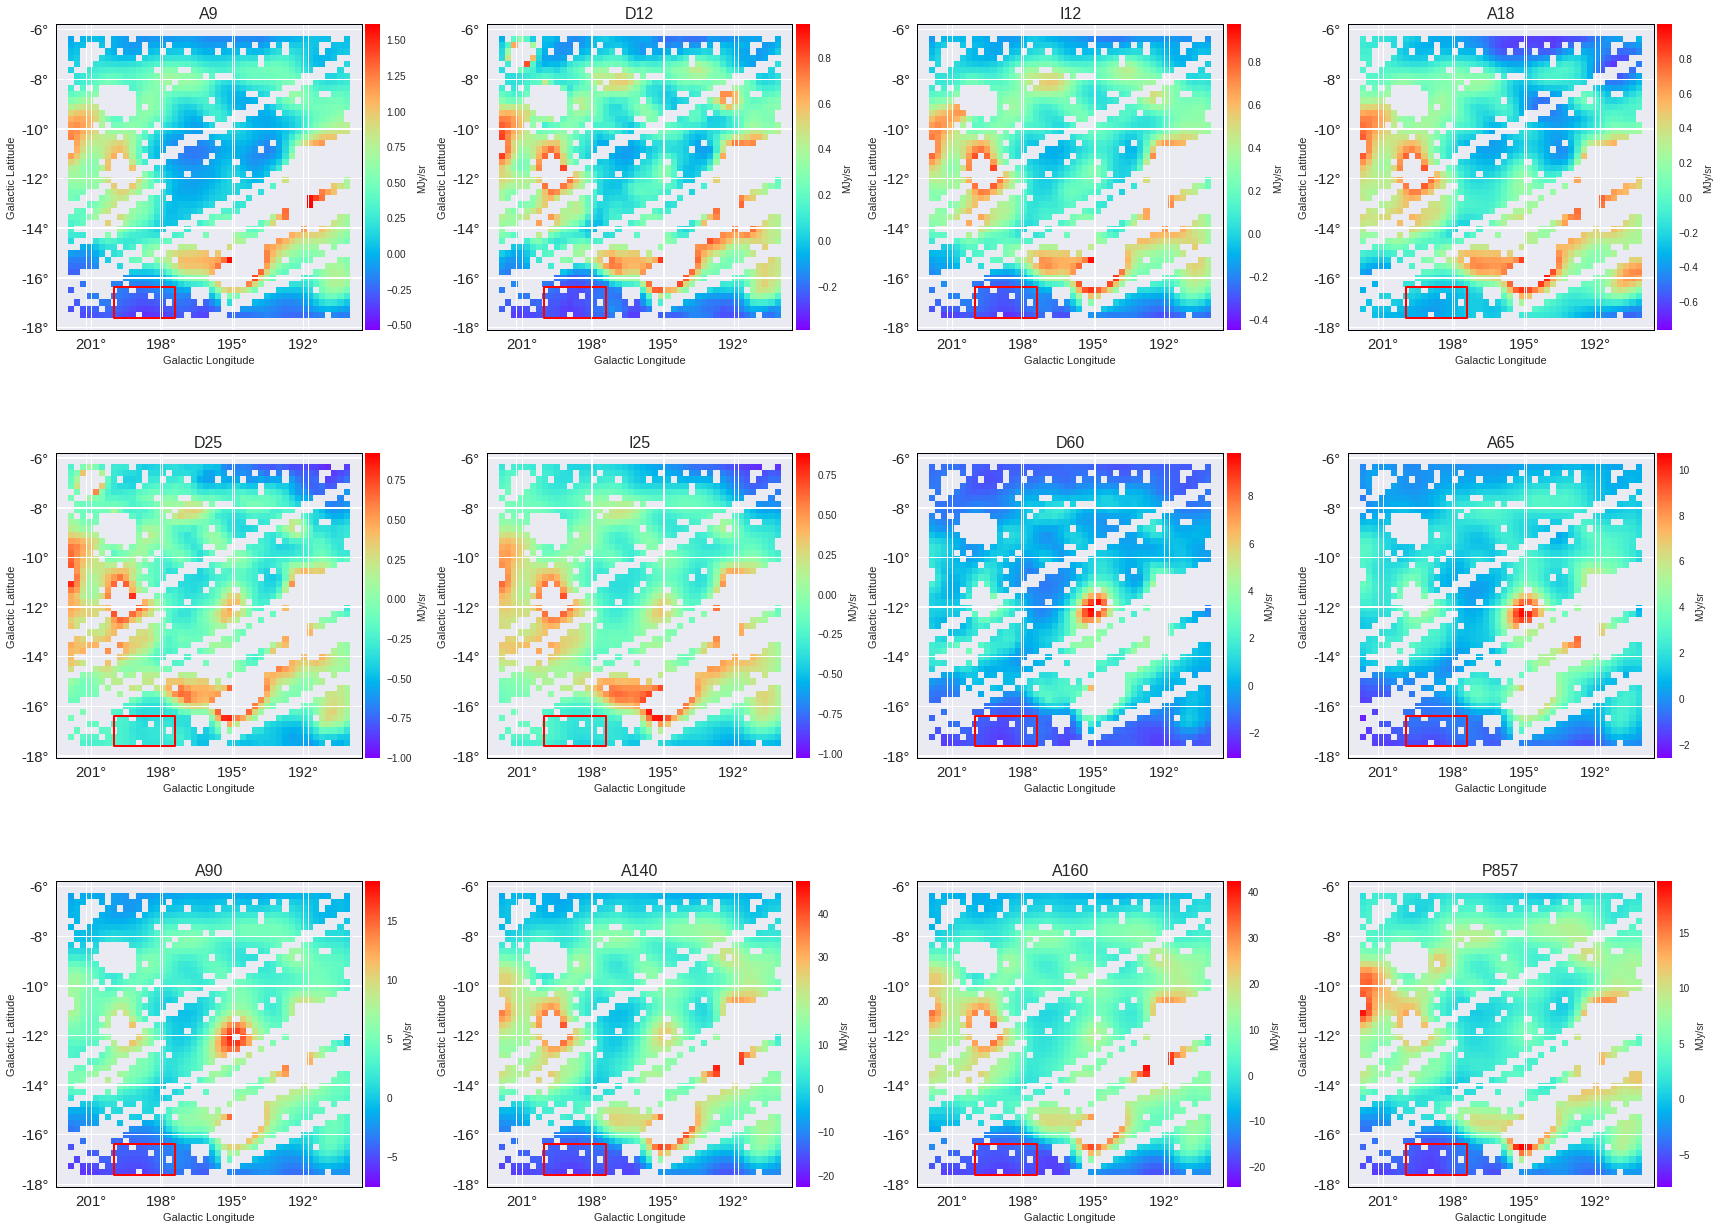

In [142]:
size = 6
num_rows = 3
num_cols = 4
def_fontsize = 16
units = 'MJy/sr'
fig = plt.figure(figsize=((size*num_cols),(size*num_rows)))

# Template HDU for fitsfigure:


hdu_temp = fits.open('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_akari_9_256.fits')

hdu_temp[0].data

for i in range(0,12):   
    
    band = lori_df_bgcorr.columns[i]
    
    hdu_temp[0].data =  lori_df_bgcorr[band].values.reshape(50,50)
    #im = im -offset[i]
    #ax[i].imshow(im,norm=SymLogNorm(linthresh=0.03, linscale=0.03,vmin=np.nanmedian(im)/2,vmax=np.nanmedian(im)*2), cmap='rainbow',origin='lower')
    #ax[i].imshow(im, cmap='rainbow',origin='lower')
    f = aplpy.FITSFigure(hdu_temp, subplot=(num_rows,num_cols,i+1), figure=fig)
    #Show the colorscale
    f.show_colorscale(cmap = cmap)
    
    #Make ticks white
    f.ticks.set_color('white')

    # Make labels smaller
    f.tick_labels.set_font(size=15)
    
    # Round out those tick labels:
    f.tick_labels.set_xformat('ddd')
    f.tick_labels.set_yformat('ddd')
    
    # Overlay a grid
    #f.add_grid()
    #f.grid.set_alpha(0.5)
    
    # Get background bounding box in world coords:
    xw, yw      = f.pixel2world(bgbox_xp, bgbox_yp)
    #d_worldx, d_worldy = 
    width  = 0.25*bgbox_xw
    height = 0.25*bgbox_yw
    # Show backgrounding boxes:
    f.show_rectangles(xw, 
                      yw, 
                      width, 
                      height, 
                      edgecolor='red',
                      linewidth=2.0) 
    # Add a colorbar
    f.add_colorbar()
    f.colorbar.set_axis_label_text(units)
    f.set_title(band, fontsize=def_fontsize)
    #f.grid()
    #f.set_title(band, fontsize = def_fontsize)
    #f.axis('off')
    
fig.tight_layout()
    
plt.savefig('../Plots/ch_lori/lori_processed_grid.pdf')
plt.show()
plt.close()

# Bootstrap analysis correlation tests:

In [132]:
import numpy.random as npr
from scipy import stats

def bootstrap(data_x, 
              data_y, 
              iterations,  
              kind='Pearson'):
    
    
    #"""Returns bootstrap estimate of 100.0*(1-alpha) CI for statistic."""
    
    #data_x_dropna = data_x[(np.isfinite(data_x)==True) & (np.isfinite(data_y)==True)].copy()
    #data_y_dropna = data_y[(np.isfinite(data_x)==True) & (np.isfinite(data_y)==True)].copy()
    
    
    nx = len(data_x)
    ny = len(data_y)

    print "Found {} valid samples (not NaN)".format(nx)
    #print "Found {} valid samples (not NaN)".format(ny)
    #print data_x_dropna
    
    corr_coeff_array = np.ones(iterations)
    
    if kind == 'Spearman':
    
        for i in range(0,iterations):
            
            idx = npr.randint(0, nx, nx)

            stat_r, stat_p = scipy.stats.spearmanr(data_x.iloc[idx],
                                                   data_y.iloc[idx])
            corr_coeff_array[i] = stat_r
    
    elif kind == 'Pearson':
            
        for i in range(0,iterations):
            
            idx = npr.randint(0, nx, nx)
            stat_r, stat_p = scipy.stats.pearsonr(data_x.iloc[idx],
                                                  data_y.iloc[idx])
            corr_coeff_array[i] = stat_r

    #print corr_coeff_array
    return corr_coeff_array



def bootstrap_run(X1_data, 
                  X2_data, 
                  Y_data,
                  kind='Pearson', 
                  iterations=10000, 
                  title=None, 
                  X1_label=None, 
                  X2_label=None,
                  ftitle='Bootstrap' ):
    
        ## Force background color to be white:
    ### Note that seaborn plotting functions my override these settings.
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    
    
    corr_array_X1 = bootstrap( X1_data,
                               Y_data, 
                               iterations, 
                               kind=kind)

    corr_array_X2 = bootstrap( X2_data,
                               Y_data, 
                               iterations, 
                               kind=kind)
    
    X1 = corr_array_X1.copy()
    X2 = corr_array_X2.copy()
    
    
    #print len(X1)
    #print len(X2)
    
    t, prob = scipy.stats.ttest_ind(X1,
                                    X2, 
                                    axis=0, 
                                    equal_var=True) #Equal_var=False for Welch's t-test
    # make plots
    
    plt.figure(figsize=(6,6))

    round_it = 3

    bins = np.linspace(0.5, 1.0, 100)

    plt.hist(X1, bins, alpha=0.5, color= 'r', label=X1_label +" "+ 
                                           str(round(np.nanmean(X1),round_it)) + " +/- " +  
                                           str(round(np.nanstd(X1),round_it)) )
    plt.hist(X2, bins, alpha=0.5, color= 'b', label=X2_label+" "+ 
                                           str(round(np.nanmean(X2),round_it)) + " +/- " +  
                                           str(round(np.nanstd(X2),round_it))
                                            + "\n" + "t-stat: "+ 
                                                       str(round(t,1))+", p-value: "+   str(round(prob,6)))
    plt.ylabel("Count", fontsize=20)
    plt.xlabel("$r_{s}$", fontsize=20)

    
    plt.legend(loc='upper left')
    
    #plt.savefig("../Plots/"+ftitle)
    plt.show()


     

In [136]:
lori_bootstraps_spearman = pd.DataFrame()

for band in lori_df.columns:
    lori_bootstraps_spearman[band] = bootstrap(lori_df_bgcorr[band].dropna(),
                            lori_df_bgcorr['AME'].dropna(),
                            10000,
                             kind='Spearman')
    


Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)


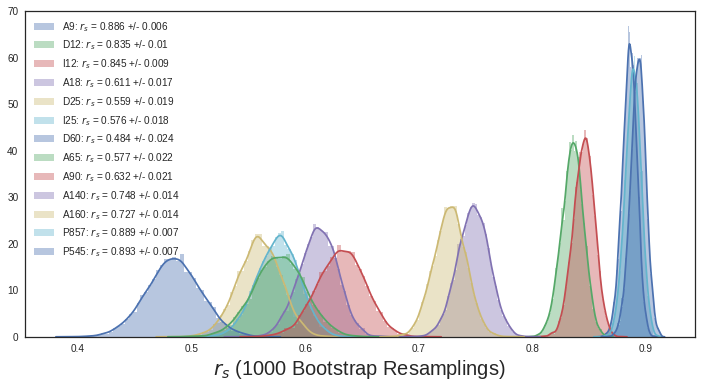

In [139]:
with sb.axes_style("white"):
    plt.figure(figsize=(12,6))
    for band in (lori_bootstraps_spearman.drop('AME',axis=1).columns):

        sb.distplot(lori_bootstraps_spearman[band], 
                    label=band+': $r_s$ = {} +/- {}'
                        .format(round(np.mean(lori_bootstraps_spearman[band]),3),
                                round(np.std(lori_bootstraps_spearman[band]),3)
                                    ))
        #plt.text(np.mean(lori_bootstraps[band]), 90, band)
    plt.xlabel('$r_s$ (1000 Bootstrap Resamplings) ',  fontsize = 20)
    plt.legend()
    plt.savefig('../Plots/ch_lori/bootstrap_vs_AME_spearman_i10000.pdf')

In [137]:
lori_bootstraps_pearson = pd.DataFrame()

for band in lori_df.columns:
    lori_bootstraps_pearson[band] = bootstrap(lori_df[band].dropna(),
                            lori_df['AME'].dropna(),
                            10000,
                             kind='Pearson')
    


Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)


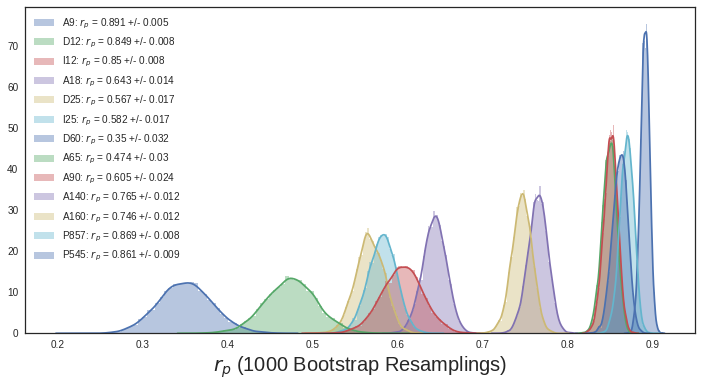

In [141]:
with sb.axes_style("white"):
    plt.figure(figsize=(12,6))
    for band in (lori_bootstraps_pearson.drop('AME',axis=1).columns):

        sb.distplot(lori_bootstraps_pearson[band], 
                    label=band+': $r_p$ = {} +/- {}'
                        .format(round(np.mean(lori_bootstraps_pearson[band]),3),
                                round(np.std(lori_bootstraps_pearson[band]),3)
                                    ))
        #plt.text(np.mean(lori_bootstraps[band]), 90, band)
    plt.xlabel('$r_p$ (1000 Bootstrap Resamplings) ', fontsize = 20)
    plt.legend()
    plt.savefig('../Plots/ch_lori/bootstrap_vs_AME_pearson_i10000.pdf')

In [482]:
lori_df_bgcorr = pd.DataFrame()

for band in lori_df.columns:
    lori_df_bgcorr[band] = lori_df[band] - lori_df[band].min()
lori_df_bgcorr['R(9:12)'] = (lori_df_bgcorr['A9']-500000).divide(lori_df_bgcorr['I12'])

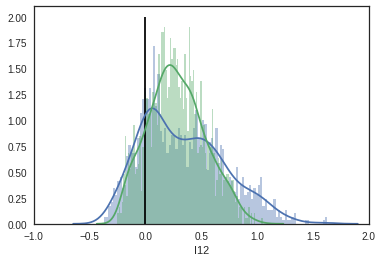

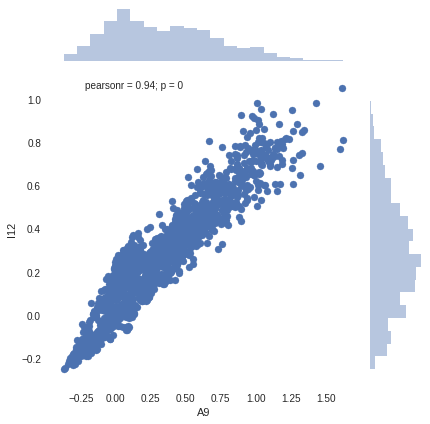

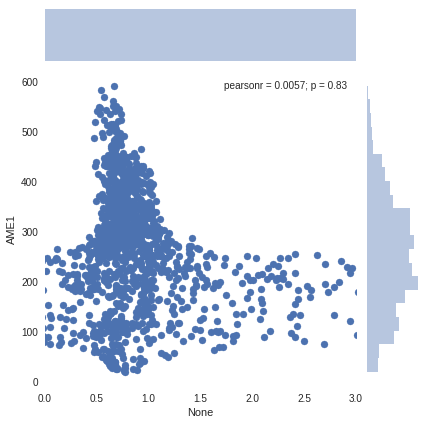

In [532]:
with sb.axes_style("white"):
    A9_histcorr  = lori_df.A9.dropna()-np.nanstd(lori_df.A9)-lori_df.A9.dropna().min()
    I12_histcorr = lori_df.I12.dropna()-lori_df.I12.dropna().min()-np.nanstd(lori_df.I12)
    A9I12_ratio = I12_histcorr/A9_histcorr
    sb.distplot(A9_histcorr,label='A9', bins=100)
    sb.distplot(I12_histcorr, label='I12', bins=100)
    #sb.distplot(lori_df.I12.dropna().divide(lori_df.A9.dropna()),label='R(I12:A9)')
    plt.xlim(-1,2)
    plt.vlines(0,0,2)
    
sb.jointplot(A9_histcorr,I12_histcorr)
sb.jointplot(A9I12_ratio, lori_df['AME1'].dropna(), xlim = (0,3))

In [609]:
A9_mean  = np.nanmean(lori_df.A9.dropna())
I12_mean = np.nanmean(lori_df.I12.dropna())

A9_bgs   = np.linspace(0,1,100)*A9_mean
I12_bgs  = np.linspace(0,1,100)*I12_mean

correlations = []
A9_data = []
I12_data = []
for i in I12_bgs:
    for j in A9_bgs:
                   
        A9_histcorr  = lori_df.A9.dropna()-j   #
        I12_histcorr = lori_df.I12.dropna()-i#*I12_mean

        ratio = (I12_histcorr)/(A9_histcorr)

        stat_r, stat_p = scipy.stats.spearmanr(ratio, lori_df['AME1'].dropna())
        correlations.append(stat_r)
        I12_data.append(i)
        A9_data.append(j)


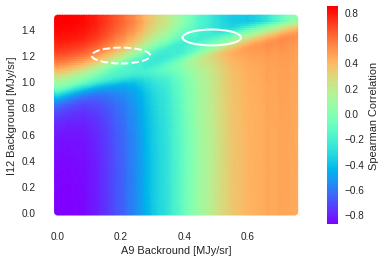

In [668]:
rect_new = patches.Ellipse(
    (A9_bg1_mean,
     I12_bg1_mean),
    A9_bg1_std,
    I12_bg1_std,
    linewidth=2,
    edgecolor='w',facecolor='none')

rect_old = patches.Ellipse(
    (0.2,1.2),
    A9_bg1_std,
    I12_bg1_std,
    linewidth=2,
    linestyle='dashed',
    edgecolor='w',facecolor='none')


fig,ax = plt.subplots(1)
sc = ax.scatter(xdata,
           ydata, 
           c=zdata,
           cmap=cmap)
plt.xlabel('A9 Backround [MJy/sr]')
plt.ylabel('I12 Background [MJy/sr]')
cb = plt.colorbar(sc)
cb.set_label("Spearman Correlation")
ax.add_patch(rect_new)
ax.add_patch(rect_old)
plt.savefig("../Plots/ch_lori/LOri_RA9I12_backgrounds_vs_spearman.pdf")

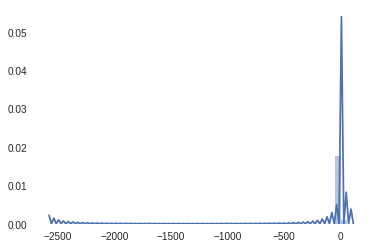

In [658]:
sb.distplot(ratio)

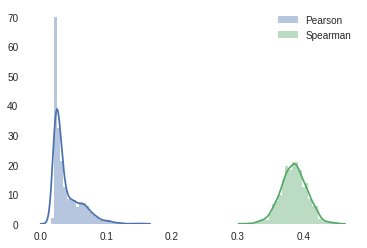

In [669]:
sb.distplot(lori_A9I12ratio_bootstraps_pearson, label = "Pearson", norm_hist= True)
sb.distplot(lori_A9I12ratio_bootstraps_spearman, label = "Spearman", norm_hist=True)
# sb.distplot(lori_A9I12ratio_bootstraps_pearson_bgmask, label = "Pearson: Bgmask", norm_hist= True)
# sb.distplot(lori_A9I12ratio_bootstraps_spearman_bgmask, label = "Spearman: Bgmask", norm_hist=True)
plt.legend()
plt.savefig('../Plots/ch_lori/LOri_RA9I12_backgrounds_bootstrap.pdf')


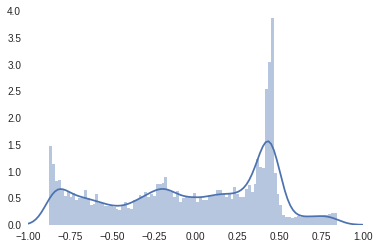

In [587]:
sb.distplot(correlations,bins = 100, norm_hist=True)
plt.xlim(-1,1)
plt.show()


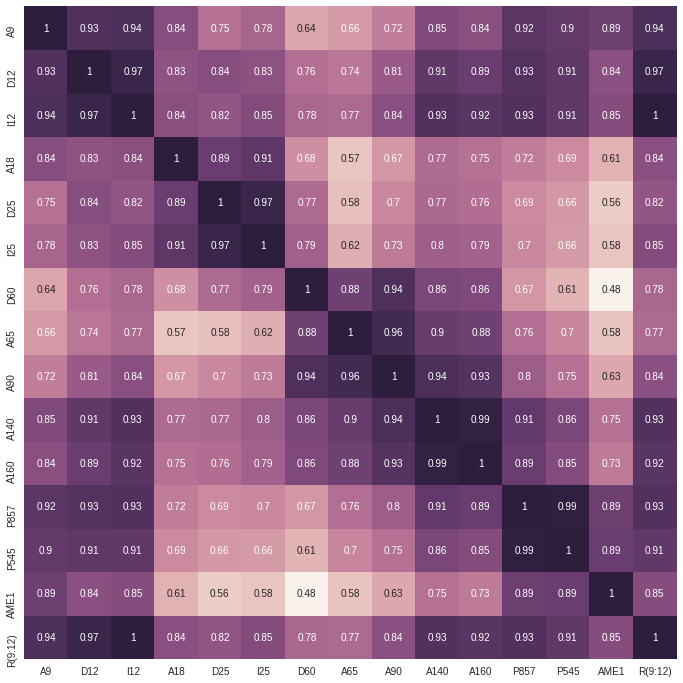

In [487]:

fig = plt.figure(figsize=(12,12))
sb.heatmap(lori_df_bgcorr.corr(method='spearman'), 
           annot=True,
          square=True,
           cbar=False)

In [481]:
sb.jointplot(pd.DataFrame(lori_df['A9'].divide(lori_df['I12'],axis=0),columns=["A9:I12"]),
             lori_df['AME'], 
             kind= "kde")

KeyError: 'AME'

In [ ]:
sb.jointplot(lori_df.D12, lori_df['AME'], kind= "kde")

In [ ]:
# Fit background plane (example from astropy documentaiton): 
#http://docs.astropy.org/en/stable/modeling/

In [450]:
from sklearn.decomposition import FastICA, NMF
from matplotlib.colors import SymLogNorm



def doSeparation(df, method='ICA', n_components=9, randstate=42): #Combining the steps, making a general function for all 3 methods
    
    # Principal component analysis
    if method=='PCA':
        
        comps = PCA(n_components=n_components)
        model = pca.fit(X).transform(X)

    # Independent component analysis:
    elif method == 'ICA':
        rng = np.random.RandomState(randstate) # The simple "fast" ICA version needs a random number generation

        model = FastICA(random_state = rng, n_components=n_components)
        comps = model.fit(df).transform(df) # We can fit and transform in one line

        comps /= comps.std(axis=0)
        
    # Non-negative matrix factorization    
    elif method =='NMF':
    
        model = NMF(n_components=n_components,)
        comps = model.fit(df).transform(df)
        
    return comps, model
        

def visComps(comps, model, labels, title_prefix = "PC_"):
    

    for i in range(0,np.size(comps,axis=1)):
        #plt.subplot(5,4,i+1)
        #plt.figure(figsize=(20,20))
        
#         try:
#             title = title_prefix+str(i+1)+":  Explained Variance = "+str(
#                 round(model.explained_variance_ratio_[i]*100,2))+"%"
            
#         except(AttributeError):
#             title = title_prefix+str(i+1)
        
        plt.imshow(comps[i].reshape((50,50)), 
                   cmap = cmap)
        plt.colorbar()
        plt.show()
        #plt.title(title)

        
def plotComps(comps, model, labels, title_prefix = "PC_"):
    
    for i in range(0,np.size(comps,axis=1)):
        
        
        try:
            title = title_prefix+str(i+1)+":  Explained Variance = "+str(
                round(model.explained_variance_ratio_[i]*100,2))+"%"
            
        except(AttributeError):
            title = title_prefix+str(i+1)
        
        
        
        #x_ = range(0,np.size(model.components_,axis=1))
        x_ = [float(l) for l in labels]
        y_ = model.components_[i]
        #y_unscaled = (y_*scaler.data_range_)+scaler.data_min_

        
        #fig, ax = plt.subplots()
            
        # create the general figure
        plt.figure()

 
        # and the first axes using subplot populated with data 
        
        plt.scatter(x_,y_, label="Scaled", c='blue')
        for i, txt in enumerate(labels):
            plt.annotate(labels[i], (x_[i],y_[i]))
        #ax1.yaxis.tick_left()
        #ax1.yaxis.set_label_position("left")
        plt.xscale('log')
        
        plt.title(title)
        
        plt.show()
        plt.close()

In [451]:
lori_df_bgcorr.columns

Index([u'A9', u'D12', u'I12', u'A18', u'D25', u'I25', u'D60', u'A65', u'A90',
       u'A140', u'A160', u'P857', u'P545', u'AME1', u'R(I12:A9)',
       u'R(A9:I12)'],
      dtype='object')

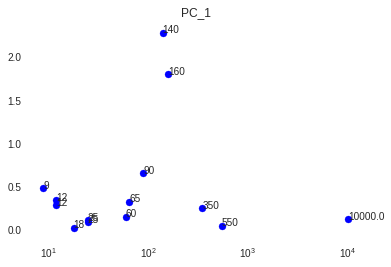

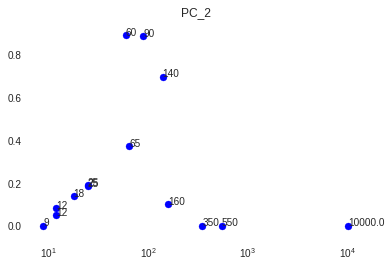

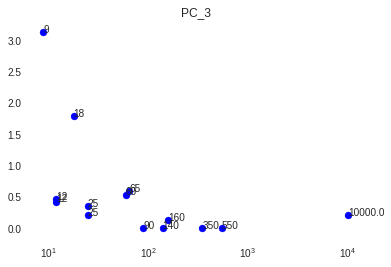

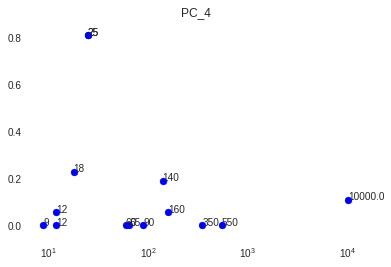

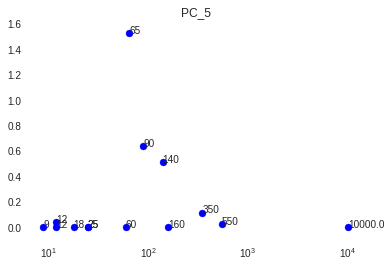

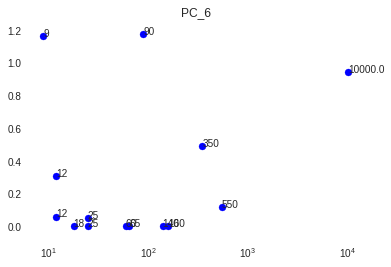

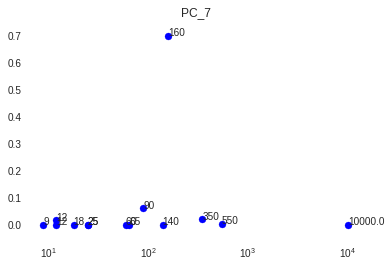

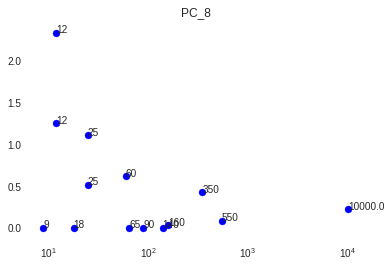

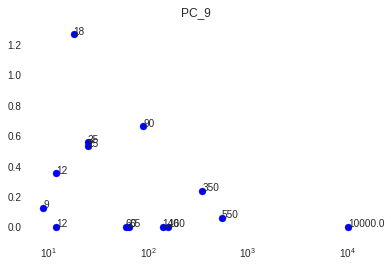

In [456]:
labels = [9,12,12,18,25,25,60,65,90,140,160,350,550,1e4]

comps, model = doSeparation(lori_df_bgcorr.drop([u'R(I12:A9)',
       u'R(A9:I12)'], axis=1).dropna()/labels, method = 'NMF')

plotComps(comps, model, labels, title_prefix = "PC_")

In [453]:
lori_pca = pd.DataFrame()

for i in range(0,5):
    
    temp = np.ones((2500,))
    temp[np.isnan(lori_df.A9)==True] = np.nan
    temp[np.isnan(lori_df.A9)==False]= comps[:,i]
    
    lori_pca[i] = temp


/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:46: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


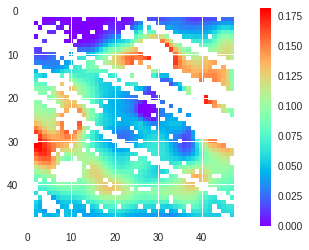

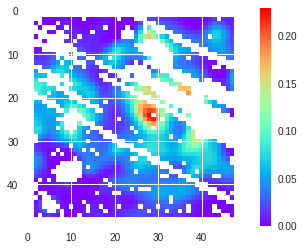

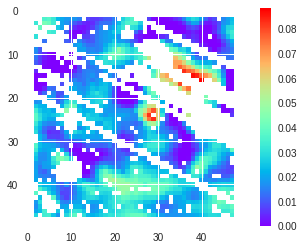

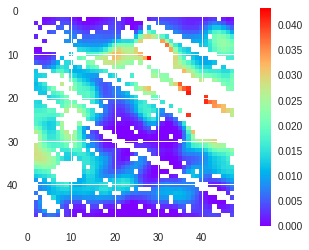

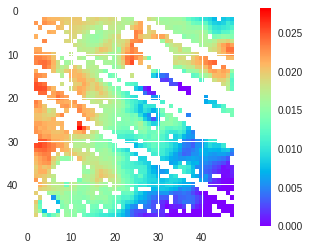

In [454]:
visComps(lori_pca, model, labels)

In [403]:
np.shape(lori_pca[np.isfinite(lori_pca)==False] )

(2500, 14)

In [404]:
np.shape(comps)

(1453, 5)

In [400]:
lori_pca[~np.isnan(lori_pca)] = comps

ValueError: other must be the same shape as self when an ndarray

In [ ]:
visComps()

In [83]:
type(lori_df['A9'][1])

numpy.float32

In [3]:
y.shape

(128, 128)

In [5]:
x.shape

(128, 128)

In [7]:
y-x

array([[   0,   -1,   -2, ..., -125, -126, -127],
       [   1,    0,   -1, ..., -124, -125, -126],
       [   2,    1,    0, ..., -123, -124, -125],
       ..., 
       [ 125,  124,  123, ...,    0,   -1,   -2],
       [ 126,  125,  124, ...,    1,    0,   -1],
       [ 127,  126,  125, ...,    2,    1,    0]])

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,  0.26942044,
                nan,         nan],
       ..., 
       [        nan,         nan,  0.39374298, ...,  0.48533431,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)

In [77]:
print enumerate(lori_df.columns)

In [ ]:
plt.imshow(lori_df.I12.reshape(50,50)-lori_df.A9.reshape(50,50), cmap=cmap)
plt.colorbar()
plt.show()
plt.imshow((lori_df.I12.reshape(50,50))/lori_df.A9.reshape(50,50), vmin = 0, vmax = 4,cmap=cmap)
plt.colorbar()
plt.show()
plt.imshow(lori_df.A160.reshape(50,50)-lori_df.A140.reshape(50,50), cmap=cmap)
plt.colorbar()
plt.show()
plt.imshow(
    (lori_df.A90.reshape(50,50)/90)/(lori_df.A140.reshape(50,50)/140), cmap=cmap)
plt.colorbar()
plt.show()
sb.jointplot(
    (lori_df.A90.dropna()/lori_df.A140.dropna()),
    lori_df.AME1,
    cmap=cmap)
plt.show()
sb.jointplot(
    lori_df.A90.dropna(),
     lori_df.A140.dropna(),
         kind = 'reg',
        ylim = (0,80),
        xlim = (0,80))
